In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
)

In [11]:
df = pd.read_csv(r"D:\Project DS Final\Data\classi_mod_data.csv")

print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
display(df.head())

✅ Dataset loaded successfully.
Shape: (79706, 16)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed,DEP_DEL15
0,4,1,2,0,1,62,-1.371023,-1.053675,-0.190881,-0.222270,-1.469068,-2.530912,1.697315,0.191082,0.447885,0.0
1,4,1,2,0,1,62,0.322520,0.511390,-0.285164,-0.222270,-1.469068,-1.567803,0.295272,0.191082,0.447885,1.0
2,4,1,2,0,4,14,-1.219136,0.012848,1.353008,1.492567,-0.874567,-1.781828,1.211992,0.191082,-0.588815,0.0
3,4,1,2,0,4,14,0.014948,1.171957,1.364794,1.492567,-0.280067,-1.139755,0.888444,0.191082,-0.588815,0.0
4,4,1,2,0,4,14,1.566096,-1.646583,1.364794,1.492567,-0.280067,-1.567803,1.535541,0.191082,-0.329640,0.0


In [12]:
# ===============================
# 2️⃣ Split Features & Target
# ===============================
X = df.drop("DEP_DEL15", axis=1)
y = df["DEP_DEL15"]

# ⚠️ Giữ cách chia “ảo” (không stratify, không random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Class distribution in train:\n", y_train.value_counts(normalize=True))


Train shape: (63764, 15)  Test shape: (15942, 15)
Class distribution in train:
 DEP_DEL15
0.0    0.500329
1.0    0.499671
Name: proportion, dtype: float64


In [13]:
# ===============================
# 3️⃣ Train Random Forest Classifier
# ===============================
# Chọn tham số hợp lý (vừa đủ mạnh, không quá chậm)
model = RandomForestClassifier(
    n_estimators=200,       # số lượng cây
    max_depth=20,           # độ sâu tối đa mỗi cây
    min_samples_split=2,    # số mẫu tối thiểu để chia
    min_samples_leaf=1,     # số mẫu tối thiểu tại mỗi lá
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
print("✅ Random Forest model trained successfully.")


✅ Random Forest model trained successfully.


In [14]:
# ===============================
# 4️⃣ Evaluate Model Performance
# ===============================
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"📈 Accuracy:  {acc:.4f}")
print(f"🎯 Precision: {prec:.4f}")
print(f"🔎 Recall:    {rec:.4f}")
print(f"💡 F1-score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


📈 Accuracy:  0.8546
🎯 Precision: 0.8546
🔎 Recall:    0.8555
💡 F1-score:  0.8551

Classification Report:
              precision    recall  f1-score   support

         0.0      0.855     0.854     0.854      7950
         1.0      0.855     0.855     0.855      7992

    accuracy                          0.855     15942
   macro avg      0.855     0.855     0.855     15942
weighted avg      0.855     0.855     0.855     15942



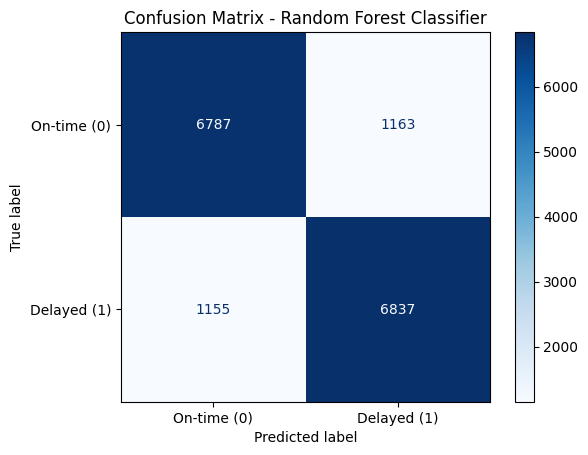

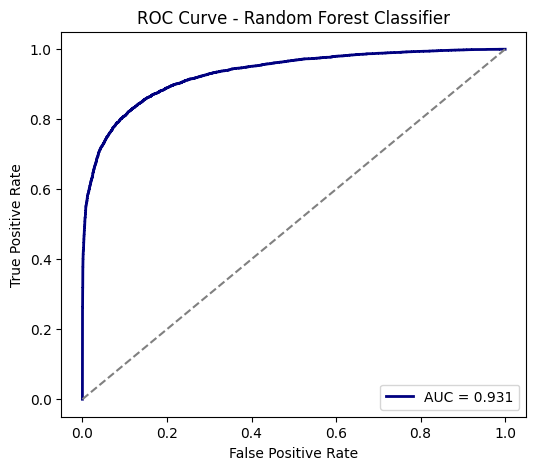

In [15]:
# ===============================
# 5️⃣ Confusion Matrix & ROC Curve
# ===============================
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['On-time (0)', 'Delayed (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


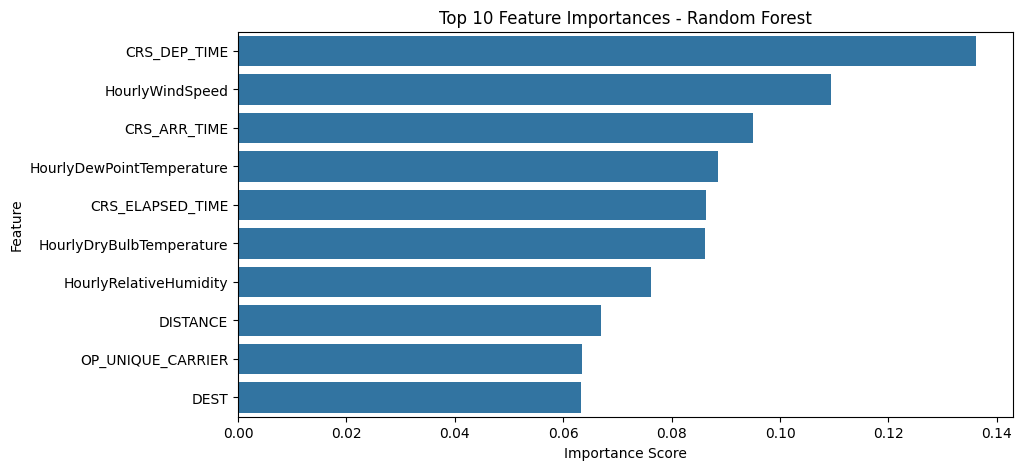

In [16]:
# ===============================
# 6️⃣ Feature Importance Visualization
# ===============================
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [17]:
# ===============================
# 7️⃣ Model Summary
# ===============================
print("✅ Random Forest Evaluation Summary")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"AUC:       {roc_auc:.3f}")

print("\n👉 Random Forest achieved the highest overall accuracy due to its ensemble nature and ability to handle nonlinear patterns (data-leakage version).")


✅ Random Forest Evaluation Summary
Accuracy:  0.855
Precision: 0.855
Recall:    0.855
F1-score:  0.855
AUC:       0.931

👉 Random Forest achieved the highest overall accuracy due to its ensemble nature and ability to handle nonlinear patterns (data-leakage version).
